# DTFF_project

## 1. Data Importation and Cleaning

In [215]:
# Import useful modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [216]:
# Load the product annoucement dates from Excel sheet -> don't forget to check current directory
df = pd.read_excel('C:/Users/Admin/Desktop/DTFF-project/Data/announcements.xlsx')
df.head()

,Company,Date,Announcement
0,TSLA,2014-01-30,Model S P85D
1,NVDA,2014-03-08,NVDA GeForce GTX 800M Series
2,META,2014-04-30,Facebook Paper
3,AMZN,2014-06-18,AMZN Fire Phone
4,NVDA,2014-09-02,GeForce GTX 980 and GTX 970


In [217]:
print(df.shape)
print(df.dtypes)
print(df.columns) 

(184, 3)
Company                  object
Date             datetime64[ns]
Announcement             object
dtype: object
Index(['Company', 'Date ', 'Announcement '], dtype='object')


In [218]:
# Change all column names because there seems to be unexpected spaces in the columnn names
df.columns = ['Name', 'Date', 'Announcement']

In [219]:
# Load the stock prices 
df_1 = pd.read_excel('C:/Users/Admin/Desktop/DTFF-project/Data/Stock_Prices.xlsx')
df_1.head()

,Name,2013-12-31 00:00:00,2014-01-01 00:00:00,2014-01-02 00:00:00,2014-01-03 00:00:00,2014-01-06 00:00:00,2014-01-07 00:00:00,2014-01-08 00:00:00,2014-01-09 00:00:00,2014-01-10 00:00:00,...,2023-12-18 00:00:00,2023-12-19 00:00:00,2023-12-20 00:00:00,2023-12-21 00:00:00,2023-12-22 00:00:00,2023-12-25 00:00:00,2023-12-26 00:00:00,2023-12-27 00:00:00,2023-12-28 00:00:00,2023-12-29 00:00:00
0,APPL,17691.13,17691.13,17442.33,17059.20,17152.22,17029.47,17137.40,16918.52,16805.66,...,197291.60,198349.10,196224.10,196073.00,194985.30,194985.30,194431.30,194532.00,194965.10,193907.60
1,NVDA,1004.27,1004.27,994.24,982.33,995.49,1011.79,1025.58,987.34,986.09,...,133078.10,131821.10,127853.50,130189.30,129764.20,129764.20,130957.40,131324.10,131603.10,131603.10
2,MSFT,52155.35,52155.35,51806.81,51458.27,50370.83,50761.19,49855.00,49534.35,50245.36,...,616923.50,617933.60,613563.20,618397.10,620118.90,620118.90,620251.10,619274.60,621277.70,622535.90
3,AMZN,20363.73,20363.73,20321.87,20243.74,20100.25,20324.92,20523.57,20477.09,20306.04,...,157348.10,157062.10,155356.60,157113.20,156684.30,156684.30,156674.00,156602.50,156643.40,155172.80
4,GOOG,1116.97,1116.97,1109.40,1101.31,1113.59,1135.05,1137.42,1126.47,1126.41,...,5408.61,5442.47,5509.78,5592.62,5635.23,5635.23,5636.43,5590.63,5585.05,5563.55


In [220]:
# Reshaping the daily stock prices DataFrame --> here, 'Date' and 'StockPrice' are new variables
df_1 = df_1.melt(id_vars=['Name'], 
                    var_name='Date', 
                    value_name='StockPrice')
df_1.head()

,Name,Date,StockPrice
0,APPL,2013-12-31 00:00:00,17691.13
1,NVDA,2013-12-31 00:00:00,1004.27
2,MSFT,2013-12-31 00:00:00,52155.35
3,AMZN,2013-12-31 00:00:00,20363.73
4,GOOG,2013-12-31 00:00:00,1116.97


In [221]:
print(df_1.shape)
print(df_1.dtypes)
print(df_1.columns) 

(26090, 3)
Name           object
Date           object
StockPrice    float64
dtype: object
Index(['Name', 'Date', 'StockPrice'], dtype='object')


In [222]:
# Make sure 'Date' columns for both dataframes are datetime type
df['Date'] = pd.to_datetime(df['Date'])
df_1['Date'] = pd.to_datetime(df_1['Date'])

In [223]:
# Merge both dataframes on 'Name' and 'Date'
# /!\ Keep in mind that we will lose the 2024 announcement dates during the merging because the stock prices ends in 2023
df = pd.merge(df, df_1, on=['Name', 'Date'], how='right')

# Here we just want to sort by company names and dates in order to facilitate the later computations, we also reset the index
df = df.sort_values(by=['Name', 'Date']).reset_index(drop=True)

df.head()

,Name,Date,Announcement,StockPrice
0,AMZN,2013-12-31,NaN,20363.73
1,AMZN,2014-01-01,NaN,20363.73
2,AMZN,2014-01-02,NaN,20321.87
3,AMZN,2014-01-03,NaN,20243.74
4,AMZN,2014-01-06,NaN,20100.25


In [224]:
print(df.shape)
print(df.dtypes)
print(df.columns) 

(26090, 4)
Name                    object
Date            datetime64[ns]
Announcement            object
StockPrice             float64
dtype: object
Index(['Name', 'Date', 'Announcement', 'StockPrice'], dtype='object')


In [225]:
# Here is to make sure that the merging did its work and there is not only nans in the 'Announcement' column
non_nan_announcement = df[df['Announcement'].notna()]
len(non_nan_announcement)

155

In [226]:
# Count missing values for each column
missing_values = df.isna().sum()

# Identify potential rows where the 'StockPrice' has a value of zero --> would be inconsistent
zero_values = df[df['StockPrice'] == 0.0]

# Identify potential rows where the 'StockPrice' has a negative value
negative_values = df[df['StockPrice'] < 0]

print(missing_values)
print(zero_values)
print(negative_values)

Name                0
Date                0
Announcement    25935
StockPrice          0
dtype: int64
Empty DataFrame
Columns: [Name, Date, Announcement, StockPrice]
Index: []
Empty DataFrame
Columns: [Name, Date, Announcement, StockPrice]
Index: []


## 2. Compute Daily Returns and Volatilities

In [227]:
# Calculate daily returns and rolling annualized volatility for each firm independently

# to annualize, just multiply by sqrt(252)
df['Daily_Return'] = df.groupby('Name')['StockPrice'].pct_change()
df['Rolling_Volatility'] = df.groupby('Name')['Daily_Return'].rolling(window=10).std().reset_index(0, drop=True)

df.head()

,Name,Date,Announcement,StockPrice,Daily_Return,Rolling_Volatility
0,AMZN,2013-12-31,NaN,20363.73,NaN,NaN
1,AMZN,2014-01-01,NaN,20363.73,0.000000,NaN
2,AMZN,2014-01-02,NaN,20321.87,-0.002056,NaN
3,AMZN,2014-01-03,NaN,20243.74,-0.003845,NaN
4,AMZN,2014-01-06,NaN,20100.25,-0.007088,NaN


In [228]:
# Count missing values for each column
missing_values = df.isna().sum()

# we get 10 nan values for the returns because there is 10 companies so the first return is always nan
# we get 100 = 10*10 for the rolling volatility because it must contain 10 elements before computing the first volatility
print(missing_values)

Name                      0
Date                      0
Announcement          25935
StockPrice                0
Daily_Return             10
Rolling_Volatility      100
dtype: int64


In [229]:
# Drop rows where 'Daily_Return' or 'Rolling_Volatility' is NaN
# /!\ Keep in mind that we will lose all the first 20 observations for each firms so 200 rows in total
df = df.dropna(subset=['Daily_Return', 'Rolling_Volatility'])

# Display the first few rows
df.head()

,Name,Date,Announcement,StockPrice,Daily_Return,Rolling_Volatility
10,AMZN,2014-01-14,NaN,20299.90,0.016778,0.010152
11,AMZN,2014-01-15,NaN,20214.63,-0.004201,0.010226
12,AMZN,2014-01-16,NaN,20211.05,-0.000177,0.010216
13,AMZN,2014-01-17,NaN,20405.61,0.009626,0.010606
14,AMZN,2014-01-20,NaN,20405.61,0.000000,0.010248


In [230]:
# Count missing values for each column
missing_values = df.isna().sum()

# everything seemed to have worked as expected
print(missing_values)

Name                      0
Date                      0
Announcement          25835
StockPrice                0
Daily_Return              0
Rolling_Volatility        0
dtype: int64


## 3. Descriptive Statistics and Data Visualization

In [231]:
# Group by 'Name' (Firm) and select the relevant columns
descriptive_stats = df.groupby('Name')['Daily_Return'].agg(['mean', 'std'])

# Display the descriptive statistics
descriptive_stats

# Calculer les statistiques descriptives
descriptive_stats = df.groupby('Name')['Daily_Return'].agg([
    ('Rendement moyen (%)', lambda x: x.mean() * 100),
    ('Écart-type (%)', lambda x: x.std() * 100),
    ('Rendement min (%)', lambda x: x.min() * 100),
    ('Rendement max (%)', lambda x: x.max() * 100),
    ('Nombre de jours', 'count')
]).round(3)

# Afficher les résultats
print("Statistiques descriptives des rendements journaliers par entreprise :")
print(descriptive_stats)

Statistiques descriptives des rendements journaliers par entreprise :
       Rendement moyen (%)  Écart-type (%)  Rendement min (%)  \
Name                                                            
AMZN                 0.100           2.055            -14.049   
APPL                 0.109           1.758            -12.865   
AVGO                 0.151           2.156            -19.913   
GOOG                 0.077           1.727            -11.634   
META                 0.098           2.315            -26.390   
MSFT                 0.112           1.675            -14.739   
NVDA                 0.230           2.872            -18.756   
TECHY                0.070           2.189            -12.418   
TSLA                 0.186           3.447            -21.063   
TSMC                 0.091           1.617             -8.870   

       Rendement max (%)  Nombre de jours  
Name                                       
AMZN              14.131             2599  
APPL             

C:\Users\Admin\AppData\Local\Temp\ipykernel_38772\4057763584.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Name', y='Avg_Vol_Change', data=summary_df, palette='Blues_d')


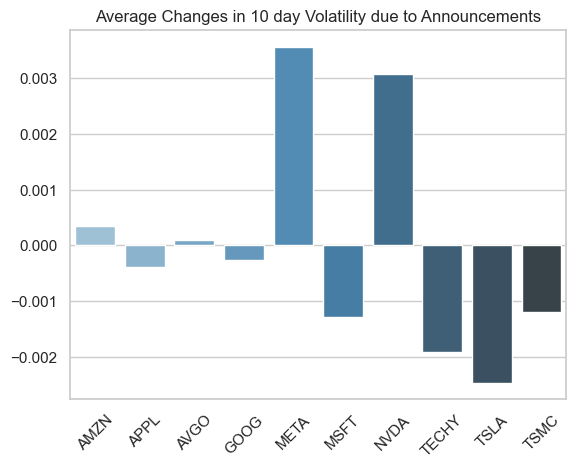

In [232]:
# Create a new DataFrame to store pre- and post-announcement values
results = []

# Iterate through each firm
for firm in df['Name'].unique():
    # Filter the data for the current firm
    firm_data = df[df['Name'] == firm].sort_values(by='Date')
    
    # Filter rows where there's an announcement
    announcements = firm_data[firm_data['Announcement'].notna()]
    
    # Loop through each announcement
    for _, row in announcements.iterrows():
        # Get the index of the current row
        current_index = row.name
        
        # Get pre- and post-announcement data
        vol_pre = firm_data.loc[current_index - 1, 'Rolling_Volatility'] if current_index - 1 in firm_data.index else None
        vol_post = firm_data.loc[current_index + 1, 'Rolling_Volatility'] if current_index + 1 in firm_data.index else None
        vol_change = vol_post - vol_pre
        
        # Append the data to the results list
        results.append({
            'Name': firm,
            'Announcement': row['Announcement'],
            'Date': row['Date'],
            'Volatility_Pre':  vol_pre,
            'Volatility_Post': vol_post,
            'Volatility_Change': vol_change
        })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Compute averages and changes grouped by firm
summary_df = results_df.groupby('Name').agg(
    Avg_Vol_Pre=('Volatility_Pre', 'mean'),
    Avg_Vol_Post=('Volatility_Post', 'mean'),
    Avg_Vol_Change=('Volatility_Change', 'mean'),
).reset_index()

# Plot average pre- and post-volatility
sns.barplot(x='Name', y='Avg_Vol_Change', data=summary_df, palette='Blues_d')

# Customize the plot
plt.title('Average Changes in 10 day Volatility due to Announcements')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45)

# Show the plot
plt.show()

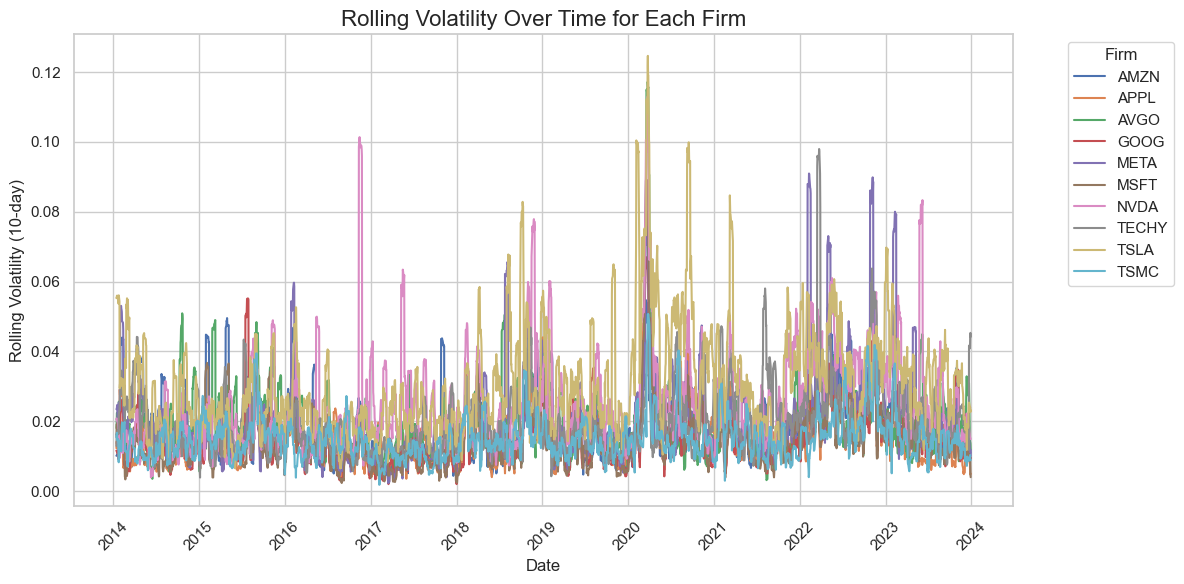

In [233]:
# Set the style for the plot (optional)
sns.set(style="whitegrid")

# Plot the rolling volatility for each firm
plt.figure(figsize=(12, 6))

# Loop through each unique firm and plot the rolling volatility
for firm in df['Name'].unique():
    firm_data = df[df['Name'] == firm]
    plt.plot(firm_data['Date'], firm_data['Rolling_Volatility'], label=firm)

# Customize the plot
plt.title('Rolling Volatility Over Time for Each Firm', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Rolling Volatility (10-day)', fontsize=12)
plt.legend(title='Firm', bbox_to_anchor=(1.05, 1), loc='upper left')  # Position the legend outside
plt.xticks(rotation=45)  # Rotate date labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

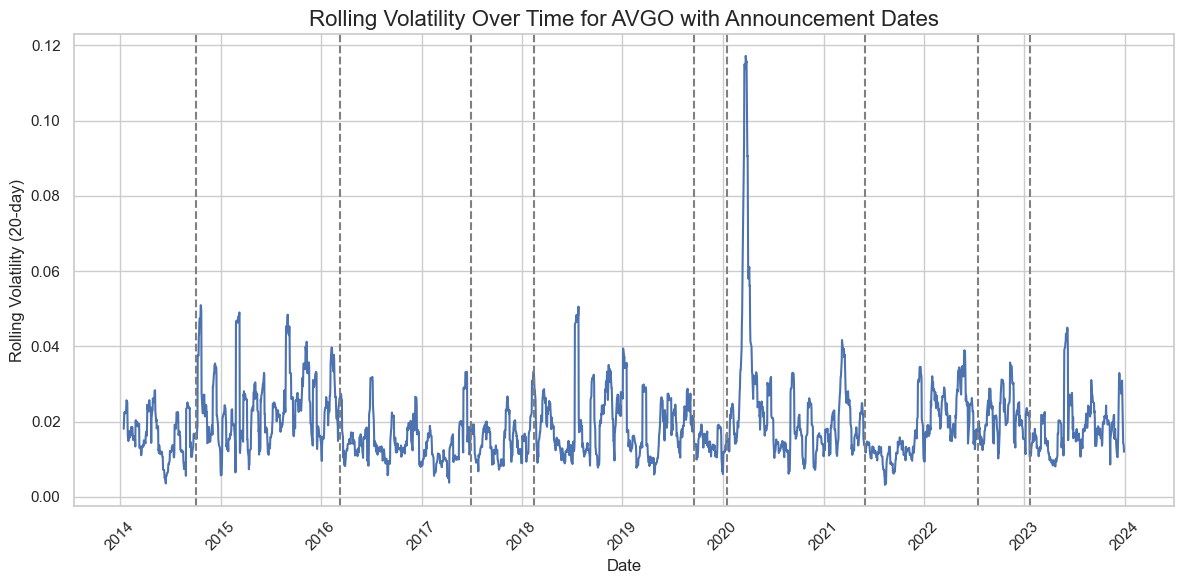

In [234]:
# Set the style for the plot (optional)
sns.set(style="whitegrid")

# Plot the rolling volatility for each firm
plt.figure(figsize=(12, 6))

# Loop through each unique firm and plot the rolling volatility
firm_data = df[df['Name'] == 'AVGO']
plt.plot(firm_data['Date'], firm_data['Rolling_Volatility'], label='AVGO')

# Highlight the announcement dates by adding vertical lines
announcement_data = df[df['Name'] == 'AVGO'].dropna(subset=['Announcement'])
for _, row in announcement_data.iterrows():
    plt.axvline(x=row['Date'], color='grey', linestyle='--')

# Customize the plot
plt.title('Rolling Volatility Over Time for AVGO with Announcement Dates', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Rolling Volatility (20-day)', fontsize=12)
plt.xticks(rotation=45)  # Rotate date labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

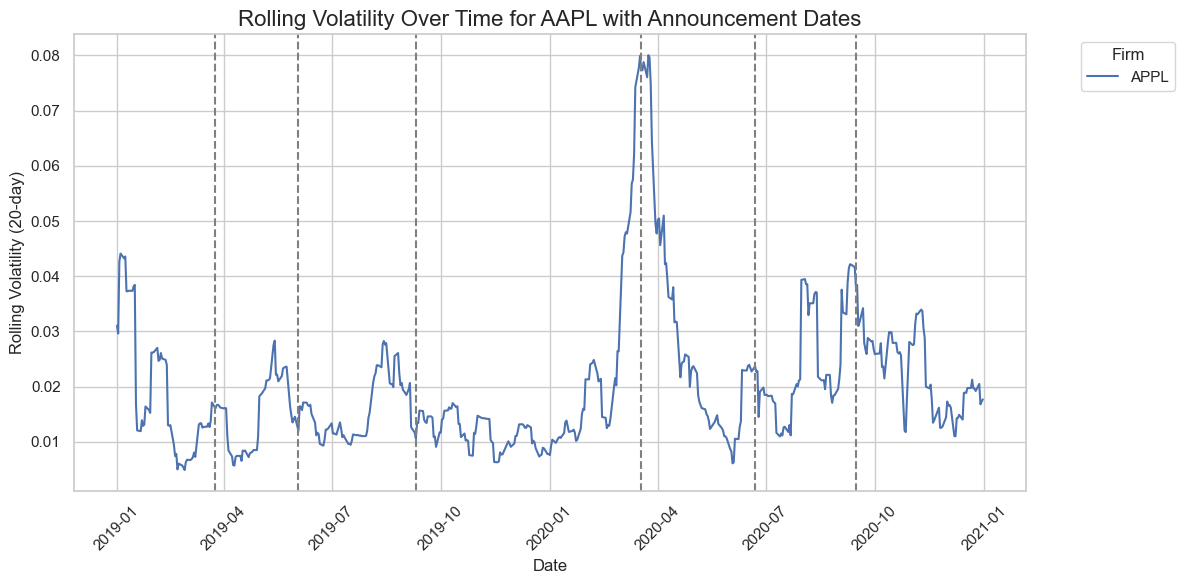

In [235]:
# Set the style for the plot (optional)
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))

# Loop through each unique firm and plot the rolling volatility
firm_data = df[(df['Name'] == 'APPL') & (df['Date'].dt.year.isin([2019, 2020]))]
plt.plot(firm_data['Date'], firm_data['Rolling_Volatility'], label='APPL')

# Highlight the announcement dates
announcement_data = df[
    (df['Name'] == 'APPL') & 
    (df['Date'].dt.year.isin([2019, 2020]))
].dropna(subset=['Announcement'])

for _, row in announcement_data.iterrows():
    plt.axvline(x=row['Date'], color='grey', linestyle='--')

# Customize the plot
plt.title('Rolling Volatility Over Time for AAPL with Announcement Dates', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Rolling Volatility (20-day)', fontsize=12)
plt.legend(title='Firm', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

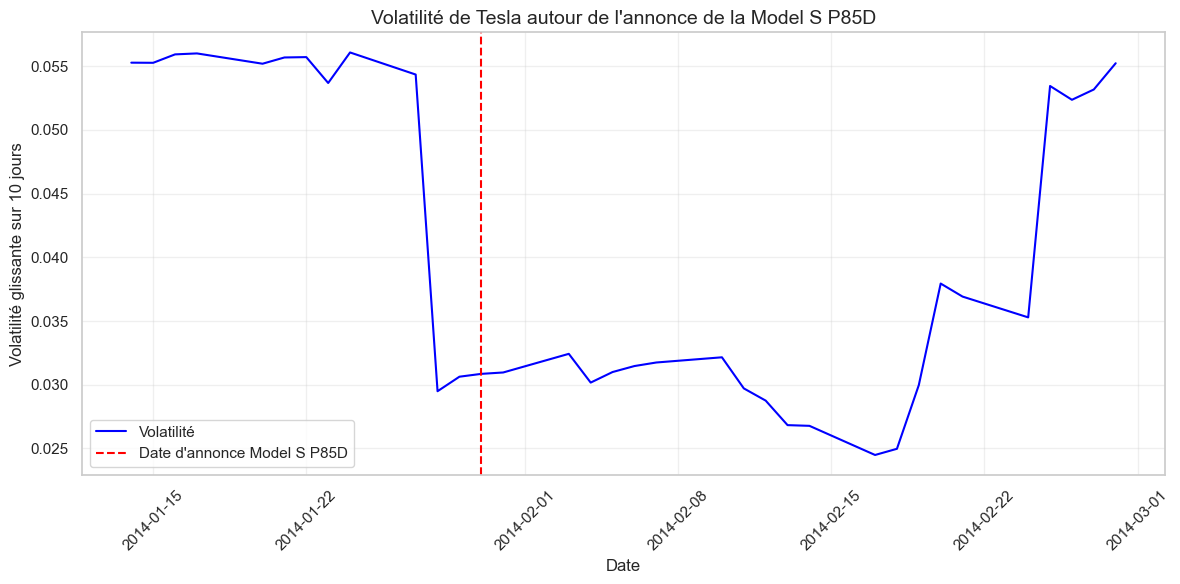

In [236]:
# Choisir une annonce spécifique de Tesla
announcement_date = '2014-01-30'  # Date de l'annonce de la Model S P85D

# Créer une fenêtre de temps autour de l'annonce (30 jours avant et après)
start_date = pd.to_datetime(announcement_date) - pd.Timedelta(days=30)
end_date = pd.to_datetime(announcement_date) + pd.Timedelta(days=30)

# Filtrer les données pour Tesla dans cette période
tesla_data = df[
    (df['Name'] == 'TSLA') & 
    (df['Date'] >= start_date) & 
    (df['Date'] <= end_date)
]

# Créer le graphique
plt.figure(figsize=(12, 6))

# Tracer la volatilité
plt.plot(tesla_data['Date'], tesla_data['Rolling_Volatility'], label='Volatilité', color='blue')

# Ajouter une ligne verticale pour la date d'annonce
plt.axvline(x=pd.to_datetime(announcement_date), color='red', linestyle='--', 
            label='Date d\'annonce Model S P85D')

# Personnaliser le graphique
plt.title('Volatilité de Tesla autour de l\'annonce de la Model S P85D', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Volatilité glissante sur 10 jours')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# Ajuster la mise en page
plt.tight_layout()

# Afficher le graphique
plt.show()


Résultats pour AMZN:
Nombre d'annonces: 18
Changement moyen de volatilité: 10.83%

Détail des annonces avec le plus grand impact:
        Date           Announcement  Percent_Change
5 2018-01-29         AMZN Go (beta)       63.397679
9 2020-06-10  AMZN Prime Day (2020)       62.705221
6 2018-09-06            Echo Studio       41.903488

Résultats pour APPL:
Nombre d'annonces: 29
Changement moyen de volatilité: 18.82%

Détail des annonces avec le plus grand impact:
         Date                                Announcement  Percent_Change
5  2016-09-07            iPhone 7, iPhone 7 Plus, AirPods      203.940777
11 2018-09-12         iPhone XS, iPhone XS Max, iPhone XR       84.447991
9  2018-03-27  Education-focused announcements (new iPad)       69.876419

Résultats pour AVGO:
Nombre d'annonces: 9
Changement moyen de volatilité: 0.61%

Détail des annonces avec le plus grand impact:
        Date                   Announcement  Percent_Change
0 2014-10-03     First 802.11ac Wi-Fi chip.  

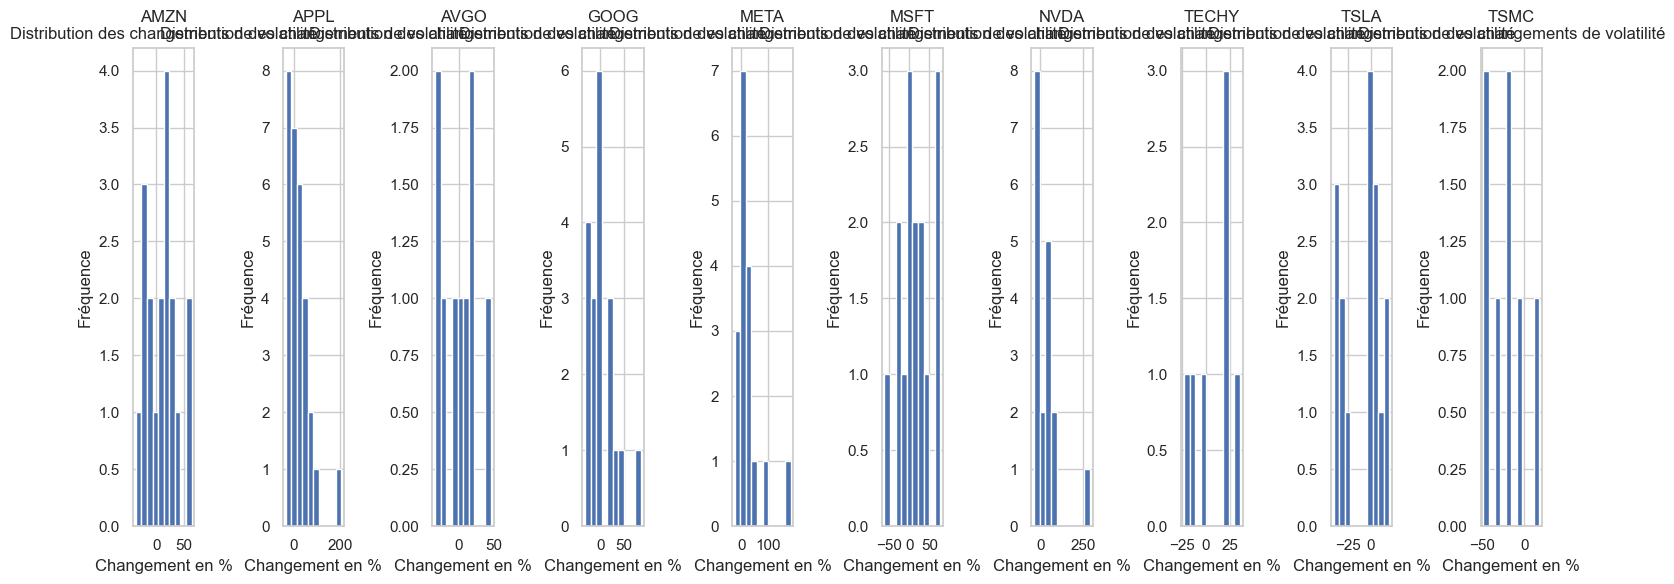

In [237]:
# 1. Calculer la volatilité moyenne avant et après les annonces
def analyze_announcement_impact(df, company, window_days=10):
    # Filtrer les données pour l'entreprise
    company_data = df[df['Name'] == company].copy()
    
    # Pour chaque annonce
    announcement_impacts = []
    for _, row in company_data[company_data['Announcement'].notna()].iterrows():
        announcement_date = row['Date']
        
        # Définir les périodes avant/après
        before_period = (announcement_date - pd.Timedelta(days=window_days), announcement_date)
        after_period = (announcement_date, announcement_date + pd.Timedelta(days=window_days))
        
        # Calculer les volatilités moyennes
        volatility_before = company_data[
            (company_data['Date'] >= before_period[0]) & 
            (company_data['Date'] < before_period[1])
        ]['Rolling_Volatility'].mean()
        
        volatility_after = company_data[
            (company_data['Date'] >= after_period[0]) & 
            (company_data['Date'] <= after_period[1])
        ]['Rolling_Volatility'].mean()
        
        # Calculer le changement en pourcentage
        pct_change = ((volatility_after - volatility_before) / volatility_before) * 100
        
        announcement_impacts.append({
            'Date': announcement_date,
            'Announcement': row['Announcement'],
            'Volatility_Before': volatility_before,
            'Volatility_After': volatility_after,
            'Percent_Change': pct_change
        })
    
    return pd.DataFrame(announcement_impacts)

# Analyser chaque entreprise
companies = df['Name'].unique()
all_results = {}

for company in companies:
    results = analyze_announcement_impact(df, company)
    all_results[company] = results
    
    print(f"\nRésultats pour {company}:")
    print(f"Nombre d'annonces: {len(results)}")
    print(f"Changement moyen de volatilité: {results['Percent_Change'].mean():.2f}%")
    print("\nDétail des annonces avec le plus grand impact:")
    print(results.nlargest(3, 'Percent_Change')[['Date', 'Announcement', 'Percent_Change']])

# 2. Test statistique pour vérifier si la différence est significative
from scipy import stats

def statistical_test(company_results):
    before_vals = company_results['Volatility_Before']
    after_vals = company_results['Volatility_After']
    
    # Test t apparié
    t_stat, p_value = stats.ttest_rel(before_vals, after_vals)
    return t_stat, p_value

# Effectuer le test pour chaque entreprise
print("\nTests statistiques:")
for company in companies:
    t_stat, p_value = statistical_test(all_results[company])
    print(f"\n{company}:")
    print(f"t-statistic: {t_stat:.4f}")
    print(f"p-value: {p_value:.4f}")
    print(f"Significatif à 5%: {'Oui' if p_value < 0.05 else 'Non'}")

# 3. Visualisation de la distribution des changements
plt.figure(figsize=(15, 6))
for i, company in enumerate(companies):
    plt.subplot(1, len(companies), i+1)
    results = all_results[company]
    plt.hist(results['Percent_Change'], bins=10)
    plt.title(f'{company}\nDistribution des changements de volatilité')
    plt.xlabel('Changement en %')
    plt.ylabel('Fréquence')

plt.tight_layout()
plt.show()

In [238]:
# Fonction pour analyser l'impact des annonces sur la volatilité
def analyze_apple_announcements(df, window_days=10):
    # Filtrer les données pour Apple (noter le changement de AAPL à APPL)
    apple_data = df[df['Name'] == 'APPL'].copy()  # Changé de 'AAPL' à 'APPL'
    
    # Pour chaque annonce
    announcement_impacts = []
    for _, row in apple_data[apple_data['Announcement'].notna()].iterrows():
        announcement_date = row['Date']
        
        # Définir les périodes avant/après
        before_period = (announcement_date - pd.Timedelta(days=window_days), announcement_date)
        after_period = (announcement_date, announcement_date + pd.Timedelta(days=window_days))
        
        # Calculer les volatilités moyennes
        volatility_before = apple_data[
            (apple_data['Date'] >= before_period[0]) & 
            (apple_data['Date'] < before_period[1])
        ]['Rolling_Volatility'].mean()
        
        volatility_after = apple_data[
            (apple_data['Date'] >= after_period[0]) & 
            (apple_data['Date'] <= after_period[1])
        ]['Rolling_Volatility'].mean()
        
        # Calculer le changement en pourcentage
        pct_change = ((volatility_after - volatility_before) / volatility_before) * 100
        
        announcement_impacts.append({
            'Date': announcement_date,
            'Announcement': row['Announcement'],
            'Volatility_Before': volatility_before,
            'Volatility_After': volatility_after,
            'Percent_Change': pct_change
        })
    
    return pd.DataFrame(announcement_impacts)

# Vérifier les noms uniques dans le DataFrame
print("Noms d'entreprises dans le DataFrame:")
print(df['Name'].unique())

# Analyser les annonces d'Apple
apple_results = analyze_apple_announcements(df)

# Afficher les résultats
print("\nRésultats pour Apple:")
print(f"Nombre total d'annonces: {len(apple_results)}")
print(f"Changement moyen de volatilité: {apple_results['Percent_Change'].mean():.2f}%")
print("\nDétail de toutes les annonces:")
print(apple_results[['Date', 'Announcement', 'Percent_Change']].sort_values('Percent_Change', ascending=False))

# Le reste du code reste identique...

Noms d'entreprises dans le DataFrame:
['AMZN' 'APPL' 'AVGO' 'GOOG' 'META' 'MSFT' 'NVDA' 'TECHY' 'TSLA' 'TSMC']

Résultats pour Apple:
Nombre total d'annonces: 29
Changement moyen de volatilité: 18.82%

Détail de toutes les annonces:
         Date                                       Announcement  \
5  2016-09-07                   iPhone 7, iPhone 7 Plus, AirPods   
11 2018-09-12                iPhone XS, iPhone XS Max, iPhone XR   
9  2018-03-27         Education-focused announcements (new iPad)   
28 2023-10-30         MacBook Pro (14-inch and 16-inch, M3 chip)   
6  2017-03-21                 9.7-inch iPad, Red iPhone 7/7 Plus   
8  2017-09-12           iPhone X, iPhone 8, Apple Watch Series 3   
21 2022-03-08  iPhone SE (3rd Gen), iPad Air (5th Gen), Mac S...   
10 2018-06-04             iOS 12, macOS Mojave, watchOS 5 (WWDC)   
23 2022-09-07  iPhone 14, iPhone 14 Plus, iPhone 14 Pro, iPho...   
7  2017-06-05        iOS 11, macOS High Sierra, watchOS 4 (WWDC)   
0  2014-09-09      


Résultats pour Apple:
Nombre total d'annonces: 29
Changement moyen de volatilité: 18.82%

Détail des annonces Apple:
         Date                                       Announcement  \
5  2016-09-07                   iPhone 7, iPhone 7 Plus, AirPods   
11 2018-09-12                iPhone XS, iPhone XS Max, iPhone XR   
9  2018-03-27         Education-focused announcements (new iPad)   
28 2023-10-30         MacBook Pro (14-inch and 16-inch, M3 chip)   
6  2017-03-21                 9.7-inch iPad, Red iPhone 7/7 Plus   
8  2017-09-12           iPhone X, iPhone 8, Apple Watch Series 3   
21 2022-03-08  iPhone SE (3rd Gen), iPad Air (5th Gen), Mac S...   
10 2018-06-04             iOS 12, macOS Mojave, watchOS 5 (WWDC)   
23 2022-09-07  iPhone 14, iPhone 14 Plus, iPhone 14 Pro, iPho...   
7  2017-06-05        iOS 11, macOS High Sierra, watchOS 4 (WWDC)   
0  2014-09-09                                           Iphone 6   
25 2023-03-07                                iPhone SE (3rd Gen)  

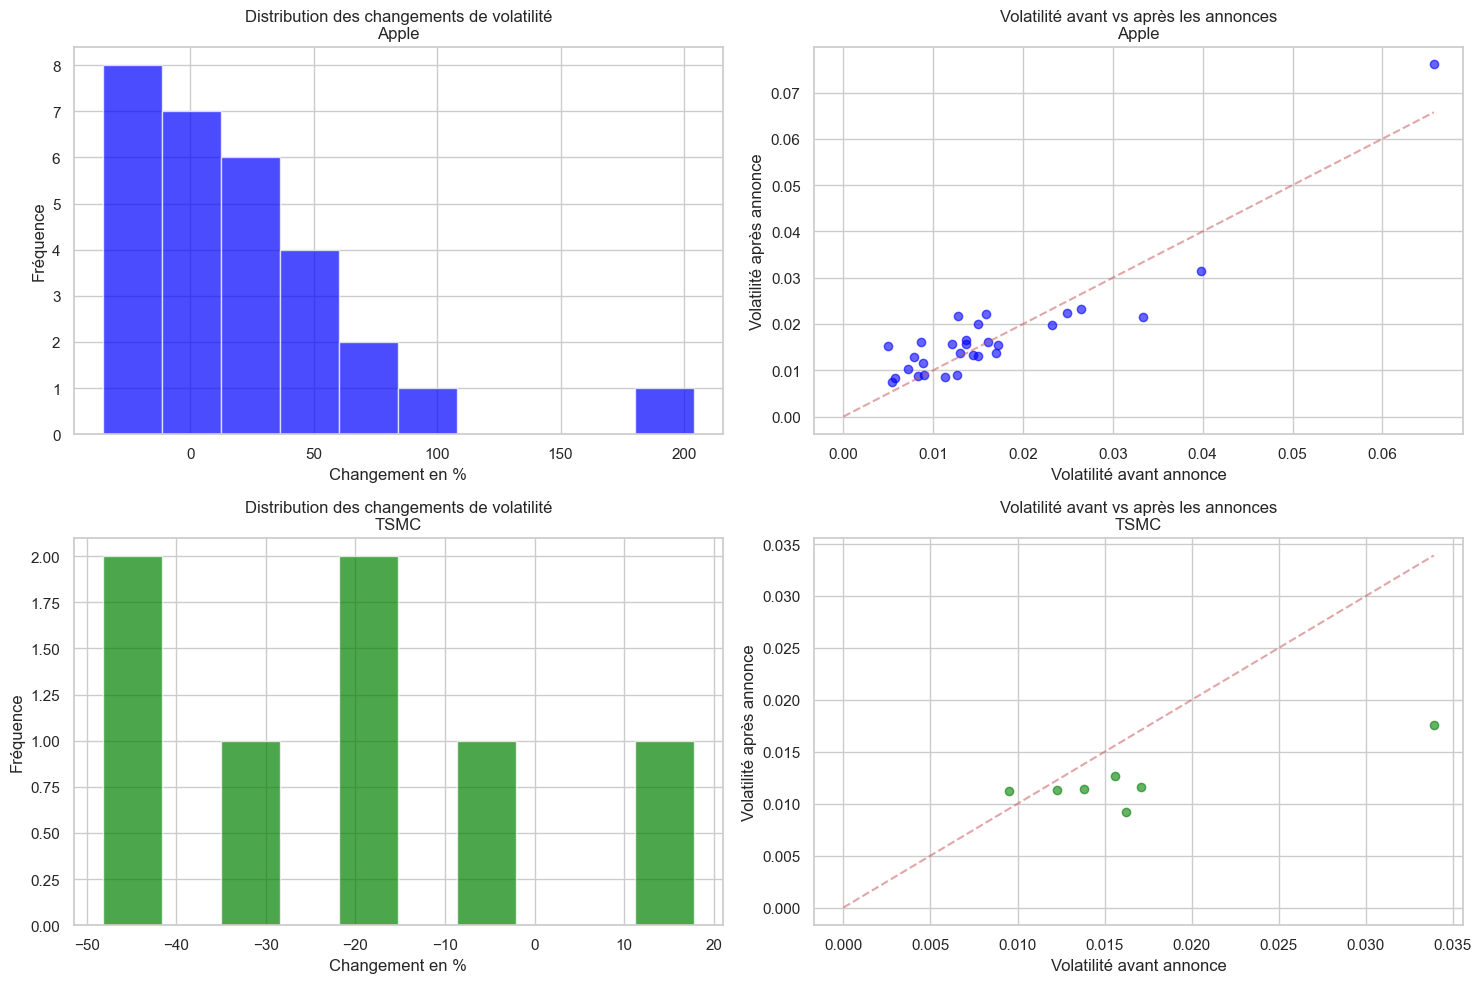

In [239]:
# Fonction pour analyser l'impact des annonces sur la volatilité
def analyze_company_announcements(df, company_name, window_days=10):
    # Filtrer les données pour l'entreprise
    company_data = df[df['Name'] == company_name].copy()
    
    # Pour chaque annonce
    announcement_impacts = []
    for _, row in company_data[company_data['Announcement'].notna()].iterrows():
        announcement_date = row['Date']
        
        # Définir les périodes avant/après
        before_period = (announcement_date - pd.Timedelta(days=window_days), announcement_date)
        after_period = (announcement_date, announcement_date + pd.Timedelta(days=window_days))
        
        # Calculer les volatilités moyennes
        volatility_before = company_data[
            (company_data['Date'] >= before_period[0]) & 
            (company_data['Date'] < before_period[1])
        ]['Rolling_Volatility'].mean()
        
        volatility_after = company_data[
            (company_data['Date'] >= after_period[0]) & 
            (company_data['Date'] <= after_period[1])
        ]['Rolling_Volatility'].mean()
        
        # Calculer le changement en pourcentage
        pct_change = ((volatility_after - volatility_before) / volatility_before) * 100
        
        announcement_impacts.append({
            'Date': announcement_date,
            'Announcement': row['Announcement'],
            'Volatility_Before': volatility_before,
            'Volatility_After': volatility_after,
            'Percent_Change': pct_change
        })
    
    return pd.DataFrame(announcement_impacts)

# Analyser les annonces pour Apple et TSMC
apple_results = analyze_company_announcements(df, 'APPL')
tsmc_results = analyze_company_announcements(df, 'TSMC')

# Afficher les résultats pour Apple
print("\nRésultats pour Apple:")
print(f"Nombre total d'annonces: {len(apple_results)}")
print(f"Changement moyen de volatilité: {apple_results['Percent_Change'].mean():.2f}%")
print("\nDétail des annonces Apple:")
print(apple_results[['Date', 'Announcement', 'Percent_Change']].sort_values('Percent_Change', ascending=False))

# Afficher les résultats pour TSMC
print("\nRésultats pour TSMC:")
print(f"Nombre total d'annonces: {len(tsmc_results)}")
print(f"Changement moyen de volatilité: {tsmc_results['Percent_Change'].mean():.2f}%")
print("\nDétail des annonces TSMC:")
print(tsmc_results[['Date', 'Announcement', 'Percent_Change']].sort_values('Percent_Change', ascending=False))

# Tests statistiques
from scipy import stats

# Test pour Apple
t_stat_apple, p_value_apple = stats.ttest_rel(apple_results['Volatility_Before'], 
                                             apple_results['Volatility_After'])

# Test pour TSMC
t_stat_tsmc, p_value_tsmc = stats.ttest_rel(tsmc_results['Volatility_Before'], 
                                           tsmc_results['Volatility_After'])

print("\nTests statistiques:")
print("Apple:")
print(f"t-statistic: {t_stat_apple:.4f}")
print(f"p-value: {p_value_apple:.4f}")
print(f"Significatif à 5%: {'Oui' if p_value_apple < 0.05 else 'Non'}")

print("\nTSMC:")
print(f"t-statistic: {t_stat_tsmc:.4f}")
print(f"p-value: {p_value_tsmc:.4f}")
print(f"Significatif à 5%: {'Oui' if p_value_tsmc < 0.05 else 'Non'}")

# Visualisation
plt.figure(figsize=(15, 10))

# 1. Distribution des changements de volatilité - Apple
plt.subplot(2, 2, 1)
plt.hist(apple_results['Percent_Change'], bins=10, color='blue', alpha=0.7)
plt.title('Distribution des changements de volatilité\nApple')
plt.xlabel('Changement en %')
plt.ylabel('Fréquence')

# 2. Comparaison avant/après pour Apple
plt.subplot(2, 2, 2)
plt.scatter(apple_results['Volatility_Before'], apple_results['Volatility_After'], 
           alpha=0.6, color='blue')
plt.plot([0, apple_results['Volatility_Before'].max()], 
         [0, apple_results['Volatility_Before'].max()], 
         'r--', alpha=0.5)
plt.title('Volatilité avant vs après les annonces\nApple')
plt.xlabel('Volatilité avant annonce')
plt.ylabel('Volatilité après annonce')

# 3. Distribution des changements de volatilité - TSMC
plt.subplot(2, 2, 3)
plt.hist(tsmc_results['Percent_Change'], bins=10, color='green', alpha=0.7)
plt.title('Distribution des changements de volatilité\nTSMC')
plt.xlabel('Changement en %')
plt.ylabel('Fréquence')

# 4. Comparaison avant/après pour TSMC
plt.subplot(2, 2, 4)
plt.scatter(tsmc_results['Volatility_Before'], tsmc_results['Volatility_After'], 
           alpha=0.6, color='green')
plt.plot([0, tsmc_results['Volatility_Before'].max()], 
         [0, tsmc_results['Volatility_Before'].max()], 
         'r--', alpha=0.5)
plt.title('Volatilité avant vs après les annonces\nTSMC')
plt.xlabel('Volatilité avant annonce')
plt.ylabel('Volatilité après annonce')

plt.tight_layout()
plt.show()

## 4. Linear Regression

In [240]:
# Create a binary column for announcements
df['Announcement_Binary'] = df['Announcement'].notna().astype(int)

# Select relevant columns
X = df[['Announcement_Binary']]  # Independent variable
y = df['Rolling_Volatility']     # Dependent variable

In [241]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Print model coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficient for Announcement_Binary: {model.coef_[0]}")

# Evaluate the model
y_pred = model.predict(X_test)
print(f"R^2 Score: {model.score(X_test, y_test)}")

Intercept: 0.019317437887891822
Coefficient for Announcement_Binary: 0.0019166839158982973
R^2 Score: -0.0005099587924513038
